<a href="https://colab.research.google.com/github/Sheyranna1/FoosballCode/blob/main/ASSIGNMENT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('MyDrive/Colab Notebooks')

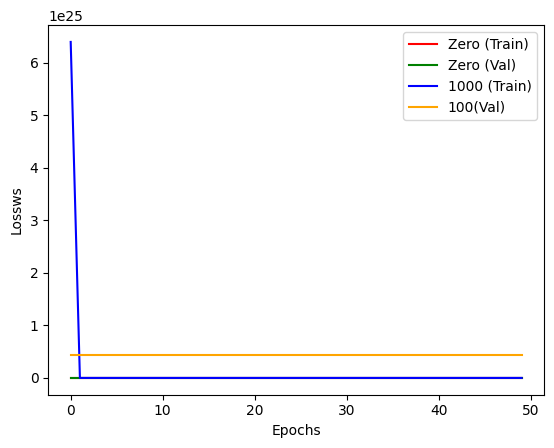

In [ ]:
# question 4


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomNormal

# data gene
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
# trainign data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# training function
def train_model(X_train, y_train, X_val, y_val, weight_init):
    model = Sequential([ Dense(168, activation='relu', input_shape=(X_train.shape[1],), kernel_initializer=weight_init),
        Dense(64, activation='relu', kernel_initializer=weight_init), Dense(1, activation='sigmoid', kernel_initializer=weight_init)])
    model.compile(optimizer=SGD(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=50, batch_size=50, validation_data=(X_val, y_val), verbose=0)
    return history

# Train models with 0.01 weight and 1000
zero_init = train_model(X_train, y_train, X_val, y_val, 'zeros')
large_init = train_model(X_train, y_train, X_val, y_val, RandomNormal(mean=0.0, stddev=1000))

# Plotting
plt.plot(zero_init.history['loss'], label='Zero (Train)', color='r')
plt.plot(zero_init.history['val_loss'], label='Zero (Val)', color='g')
plt.plot(large_init.history['loss'], label='1000 (Train)', color='b')
plt.plot(large_init.history['val_loss'], label='100(Val)', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Lossws')
plt.legend()
plt.show()


L2 norm of w: 0.009057915769517422


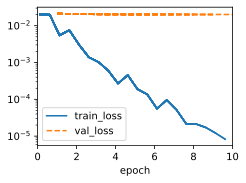

In [ ]:
!pip install d2l

import torch
from torch import nn
from d2l import torch as d2l

class Data(d2l.DataModule):
    def __init__(self, num_train, num_val, num_inputs, batch_size):
        self.save_hyperparameters()
        n = num_train + num_val
        self.X = torch.randn(n, num_inputs)
        noise = torch.randn(n, 1) * 0.01
        w, b = torch.ones((num_inputs, 1)) * 0.01, 0.05
        self.y = torch.matmul(self.X, w) + b + noise

    def get_dataloader(self, train):
        i = slice(0, self.num_train) if train else slice(self.num_train, None)
        return self.get_tensorloader([self.X, self.y], train, i)

def l2_penalty(w):
    return (w ** 2).sum() / 2

class WeightDecayScratch(d2l.LinearRegressionScratch):
    def __init__(self, num_inputs, lambd, lr, sigma=0.01):
        super().__init__(num_inputs, lr, sigma)
        self.save_hyperparameters()

    def loss(self, y_hat, y):
        return (super().loss(y_hat, y) +
                self.lambd * l2_penalty(self.w))

data = Data(num_train=20, num_val=100, num_inputs=200, batch_size=5)
trainer = d2l.Trainer(max_epochs=10)

def train_scratch(lambd):
    model = WeightDecayScratch(num_inputs=200, lambd=lambd, lr=0.01)
    model.board.yscale='log'
    trainer.fit(model, data)
    print('L2 norm of w:', float(l2_penalty(model.w)))

# Call train_scratch function outside
train_scratch(0)
